# Statistical Data Quality

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Data

In [2]:
def generate_dataset(n=100, outliers=5):
    # generate a random dataset of n points
    data = np.random.normal(
        loc=0.0, 
        scale=1.0, 
        size=n
    ) 
    # add outliers
    outlier_indices = np.random.choice(
        np.arange(n), 
        size=outliers, 
        replace=False
    )
    outlier_values = np.random.normal(
        loc=5.0, 
        scale=1.0, 
        size=outliers
    )
    data[outlier_indices] = outlier_values
    return data

In [4]:
data = generate_dataset(n=1000, outliers=50)

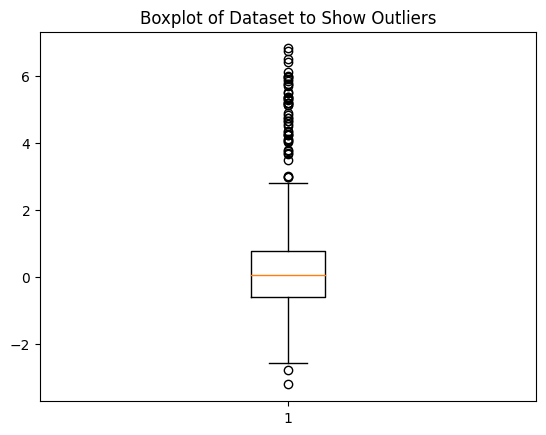

In [18]:
plt.clf()
plt.boxplot(data)
plt.title("Boxplot of Dataset to Show Outliers")
plt.show()

## IQR

In [28]:
def calculate_iqr(data, perc_range = [25, 75], print_stats = True):
    # calculate the quartiles and IQR
    r1, r2 = np.percentile(data, perc_range)
    iqr = r2 - r1

    # calculate the upper and lower bounds
    upper_bound = r2 + (1.5 * iqr)
    lower_bound = r1 - (1.5 * iqr)

    # identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if print_stats:
        print("Q1: ", r1)
        print("Q3: ", r2)
        print("IQR: ", iqr)
        print("Upper Bound: ", upper_bound)
        print("Lower Bound: ", lower_bound)
        print("Outliers: ", outliers)
        print("Outlier Count: ", len(outliers))
    return outliers

In [29]:
calculate_iqr(data, perc_range = [25, 75], print_stats = True)

Q1:  -0.6026222641850383
Q3:  0.7622751385082053
IQR:  1.3648974026932437
Upper Bound:  2.809621242548071
Lower Bound:  -2.6499683682249042
Outliers:  [ 4.85102334  2.98933461  4.2460076   4.06547636  5.85691357  4.7643031
  3.70808994  5.38083593 -3.21150318  4.34178282  5.27943278  5.18832276
  3.49523809  5.18879255  6.11985401  6.82788081  4.28102737  2.98614249
  5.75549653  6.42204428  4.6554984   5.91835923  5.51099106  3.68811904
  6.50303444  5.9797936   4.66798067  5.12729217  4.58521303  3.75902407
  4.51499206  3.00918897  5.37526903  5.51825815  6.75897833  4.09084031
  6.00309356  5.3467973   4.8990804   5.186047    3.79715411 -2.78076139
  5.77517692  4.04405104  4.12500195  4.74194492  4.37178552  5.32829414
  5.9813509   4.23594793  5.14458149  5.7191544 ]
Outlier Count:  52


array([ 4.85102334,  2.98933461,  4.2460076 ,  4.06547636,  5.85691357,
        4.7643031 ,  3.70808994,  5.38083593, -3.21150318,  4.34178282,
        5.27943278,  5.18832276,  3.49523809,  5.18879255,  6.11985401,
        6.82788081,  4.28102737,  2.98614249,  5.75549653,  6.42204428,
        4.6554984 ,  5.91835923,  5.51099106,  3.68811904,  6.50303444,
        5.9797936 ,  4.66798067,  5.12729217,  4.58521303,  3.75902407,
        4.51499206,  3.00918897,  5.37526903,  5.51825815,  6.75897833,
        4.09084031,  6.00309356,  5.3467973 ,  4.8990804 ,  5.186047  ,
        3.79715411, -2.78076139,  5.77517692,  4.04405104,  4.12500195,
        4.74194492,  4.37178552,  5.32829414,  5.9813509 ,  4.23594793,
        5.14458149,  5.7191544 ])

## Standard Deviation

In [30]:
def calculate_sd(data, N, print_stats = True):
    # calculate the mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # calculate the upper and lower bounds
    upper_bound = mean + (N * std_dev)
    lower_bound = mean - (N * std_dev)

    # identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if print_stats:
        # print the results
        print("Mean: ", mean)
        print("Standard Deviation: ", std_dev)
        print("Upper Bound: ", upper_bound)
        print("Lower Bound: ", lower_bound)
        print("Outliers: ", outliers)
        print("Outlier Count: ", len(outliers))
    return outliers

In [31]:
calculate_sd(data, N = 2, print_stats = True)

Mean:  0.2426396338495449
Standard Deviation:  1.4310958170615518
Upper Bound:  3.1048312679726484
Lower Bound:  -2.6195520002735586
Outliers:  [ 4.85102334  4.2460076   4.06547636  5.85691357  4.7643031   3.70808994
  5.38083593 -3.21150318  4.34178282  5.27943278  5.18832276  3.49523809
  5.18879255  6.11985401  6.82788081  4.28102737  5.75549653  6.42204428
  4.6554984   5.91835923  5.51099106  3.68811904  6.50303444  5.9797936
  4.66798067  5.12729217  4.58521303  3.75902407  4.51499206  5.37526903
  5.51825815  6.75897833  4.09084031  6.00309356  5.3467973   4.8990804
  5.186047    3.79715411 -2.78076139  5.77517692  4.04405104  4.12500195
  4.74194492  4.37178552  5.32829414  5.9813509   4.23594793  5.14458149
  5.7191544 ]
Outlier Count:  49


array([ 4.85102334,  4.2460076 ,  4.06547636,  5.85691357,  4.7643031 ,
        3.70808994,  5.38083593, -3.21150318,  4.34178282,  5.27943278,
        5.18832276,  3.49523809,  5.18879255,  6.11985401,  6.82788081,
        4.28102737,  5.75549653,  6.42204428,  4.6554984 ,  5.91835923,
        5.51099106,  3.68811904,  6.50303444,  5.9797936 ,  4.66798067,
        5.12729217,  4.58521303,  3.75902407,  4.51499206,  5.37526903,
        5.51825815,  6.75897833,  4.09084031,  6.00309356,  5.3467973 ,
        4.8990804 ,  5.186047  ,  3.79715411, -2.78076139,  5.77517692,
        4.04405104,  4.12500195,  4.74194492,  4.37178552,  5.32829414,
        5.9813509 ,  4.23594793,  5.14458149,  5.7191544 ])

---